# **Import Library**

In [1]:
#linear algebra
import pandas as pd

# data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

# sklearn for splitting the data
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Import Dataset**

Dataset langsung diakses ke google drive, sehingga tidak perlu mengupload dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
!ls "drive/My Drive/malin"

used_cars.csv


In [0]:
dataset = pd.read_csv('/content/drive/My Drive/malin/used_cars.csv')

# **Eksplorasi dan Persiapan data**

Pada tahapan ini dilakukan cleansing data seperti menghilangkan missing value, outlier, kesalahan input, dll. Lalu  sebelum melakukan cleansing saya melakukan drop/hapus beberapa atribut yang dirasa tidak mempunyai korelasi dengan class lalu melakukan encode.

Setelah itu melakukan proses eksplorasi data untuk dilakukan tahap selanjutnya yaitu Feature Selection. Di feature selection ini dilihat atribut mana yang mempunyai korelasi/hubungan yang tinggi dengan class(title_status)


In [0]:
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df = dataset.drop(columns=['image_url','url','description','region_url','county'])

In [0]:
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,state,lat,long
0,7034441763,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,ut,40.7372,-111.858
1,7034440610,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,ut,40.5881,-111.884
2,7034440588,salt lake city,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,ut,40.5881,-111.884
3,7034440546,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,ut,40.5881,-111.884
4,7034406932,salt lake city,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,7049052853,kennewick-pasco-richland,49999,2016.0,ram,cummin 2500 laramie,NaN,NaN,diesel,43406.0,clean,automatic,3C6UR5FL7GG142137,4wd,NaN,truck,grey,wa,46.2348,-119.128
19997,7049052797,kennewick-pasco-richland,12127,2018.0,nissan,sentra,NaN,4 cylinders,gas,32867.0,clean,automatic,3N1AB7AP4JY251861,fwd,NaN,sedan,NaN,wa,46.5642,-120.496
19998,7049049369,kennewick-pasco-richland,0,2019.0,jeep,grand cherokee limited,NaN,6 cylinders,gas,17514.0,clean,automatic,1C4RJFBG9KC713921,4wd,NaN,SUV,NaN,wa,46.0783,-118.293
19999,7049042761,kennewick-pasco-richland,14661,2017.0,toyota,corolla,NaN,4 cylinders,gas,30486.0,clean,automatic,2T1BURHE5HC804636,fwd,NaN,sedan,NaN,wa,46.5642,-120.496


## **Taking care missing value**

Mengganti missing value dengan mean, tetapi untuk missing value di class langsung saya hapus.

In [0]:
df ['year'] = df['year'].replace(np.NaN , df['year'].mean())
df ['odometer'] = df['odometer'].replace(np.NaN , df['odometer'].mean())
df ['lat'] = df['lat'].replace(np.NaN , df['lat'].mean())
df ['long'] = df['long'].replace(np.NaN , df['long'].mean())

In [0]:
df =df.dropna(how='all', subset=['title_status'])

In [0]:
df = df.fillna('-')

In [9]:
print(df.isnull().sum()) 

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
vin             0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64


## **Taking care outlier**

Melihat outlier pada data denga tipe float

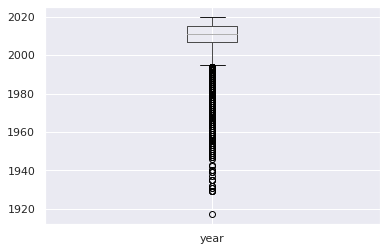

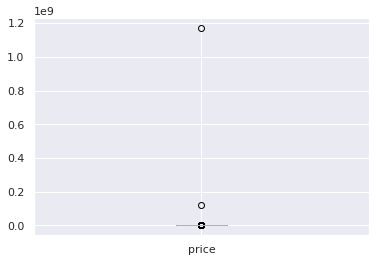

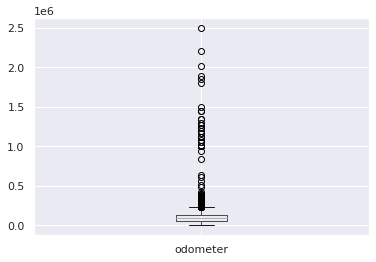

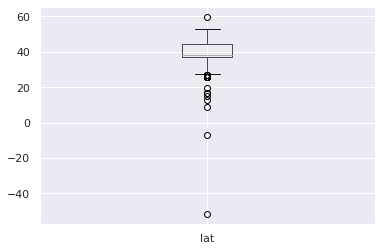

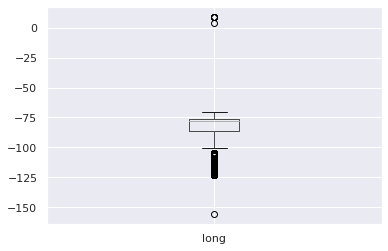

In [10]:
plt.figure()
df.boxplot(['year'])

plt.figure()
df.boxplot(['price'])

plt.figure()
df.boxplot(['odometer',])

plt.figure()
df.boxplot(['lat',])

plt.figure()
df.boxplot(['long',])

## **MENGHAPUS OUTLIER DI ATRIBUT PRICE**

In [0]:
df = df[df.price > 0]

## **Exploration data**

In [12]:
df.shape

(17408, 20)

In [13]:
df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
state            object
lat             float64
long            float64
dtype: object

In [14]:
df.describe()

,id,price,year,odometer,lat,long
count,1.740800e+04,1.740800e+04,17408.000000,1.740800e+04,17408.000000,17408.000000
mean,7.043212e+09,8.798878e+04,2009.345242,1.024656e+05,40.572577,-86.904214
std,4.704549e+06,8.935022e+06,8.133930,7.763948e+04,4.509480,18.567203
min,7.032597e+09,1.000000e+00,1917.000000,0.000000e+00,-51.812200,-155.901000
25%,7.040080e+09,5.695000e+03,2006.000000,6.045600e+04,37.289500,-84.411800
50%,7.043899e+09,1.049500e+04,2011.000000,9.916435e+04,38.273500,-77.609400
75%,7.047130e+09,1.899000e+04,2015.000000,1.315405e+05,44.457800,-76.243700
max,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,59.746600,9.095700


In [15]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,state,lat,long
0,7034441763,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,ut,40.7372,-111.858
2,7034440588,salt lake city,46463,2015.0,gmc,sierra 1500,excellent,-,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,-,-,white,ut,40.5881,-111.884
4,7034406932,salt lake city,49999,2018.0,ford,f-450,-,-,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,-,pickup,white,ut,40.3744,-104.694
5,7034406582,salt lake city,13999,2009.0,ram,-,-,-,gas,120057.0,clean,automatic,1D3HV18P89S777871,4wd,-,pickup,silver,ut,40.3744,-104.694
6,7034405619,salt lake city,34500,2017.0,ford,f-350,-,-,diesel,95484.0,clean,automatic,1FT8W3BT2HEE98744,4wd,-,pickup,white,ut,40.3744,-104.694


## **Feature Selection**

sebelum melakukan feature selection, saya melakukan encode pada feature yang bertipe data object. agar bisa dilihat korelasinya dengan class

In [16]:
kolom=df.columns.values.tolist()
for x in kolom:
    if df[x].dtype=='object':
        df[x]=df[x].astype(str)
df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
state            object
lat             float64
long            float64
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

num={}
df_num=pd.DataFrame(num)

print(kolom)

print()
for x in kolom:
    print(x)
    df_num[x]=encoder.fit_transform(df[x])

df_num.head(10)

['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin', 'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long']

id
region
price
year
manufacturer
model
condition
cylinders
fuel
odometer
title_status
transmission
vin
drive
size
type
paint_color
state
lat
long


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,state,lat,long
0,1057,12,1289,77,38,2134,1,4,3,2909,0,2,7864,1,1,5,1,0,1577,306
1,1055,12,2126,80,13,3202,1,0,3,220,0,1,4550,1,0,0,11,0,1572,304
2,1051,12,2157,83,12,1789,0,0,1,3265,0,1,1333,1,0,9,11,0,1568,319
3,1049,12,1042,73,32,0,0,0,3,5941,0,1,612,1,0,9,10,0,1568,319
4,1048,12,1940,82,12,1766,0,0,1,4582,0,1,1300,1,0,9,11,0,1568,319
5,1047,12,1071,71,13,3201,0,0,3,4237,0,1,2622,1,0,9,0,0,1568,319
6,1045,12,918,78,12,1745,0,0,3,8445,0,1,1269,1,0,9,11,0,1568,319
7,1044,12,1940,77,32,0,0,0,1,6356,0,1,4218,1,0,9,10,0,1568,319
8,1043,12,391,58,12,1745,0,0,3,7733,0,2,1577,1,3,9,11,0,1568,319
9,1042,12,1203,78,13,4010,0,0,5,7417,0,1,2420,1,0,1,10,0,1568,319


In [0]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline  

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

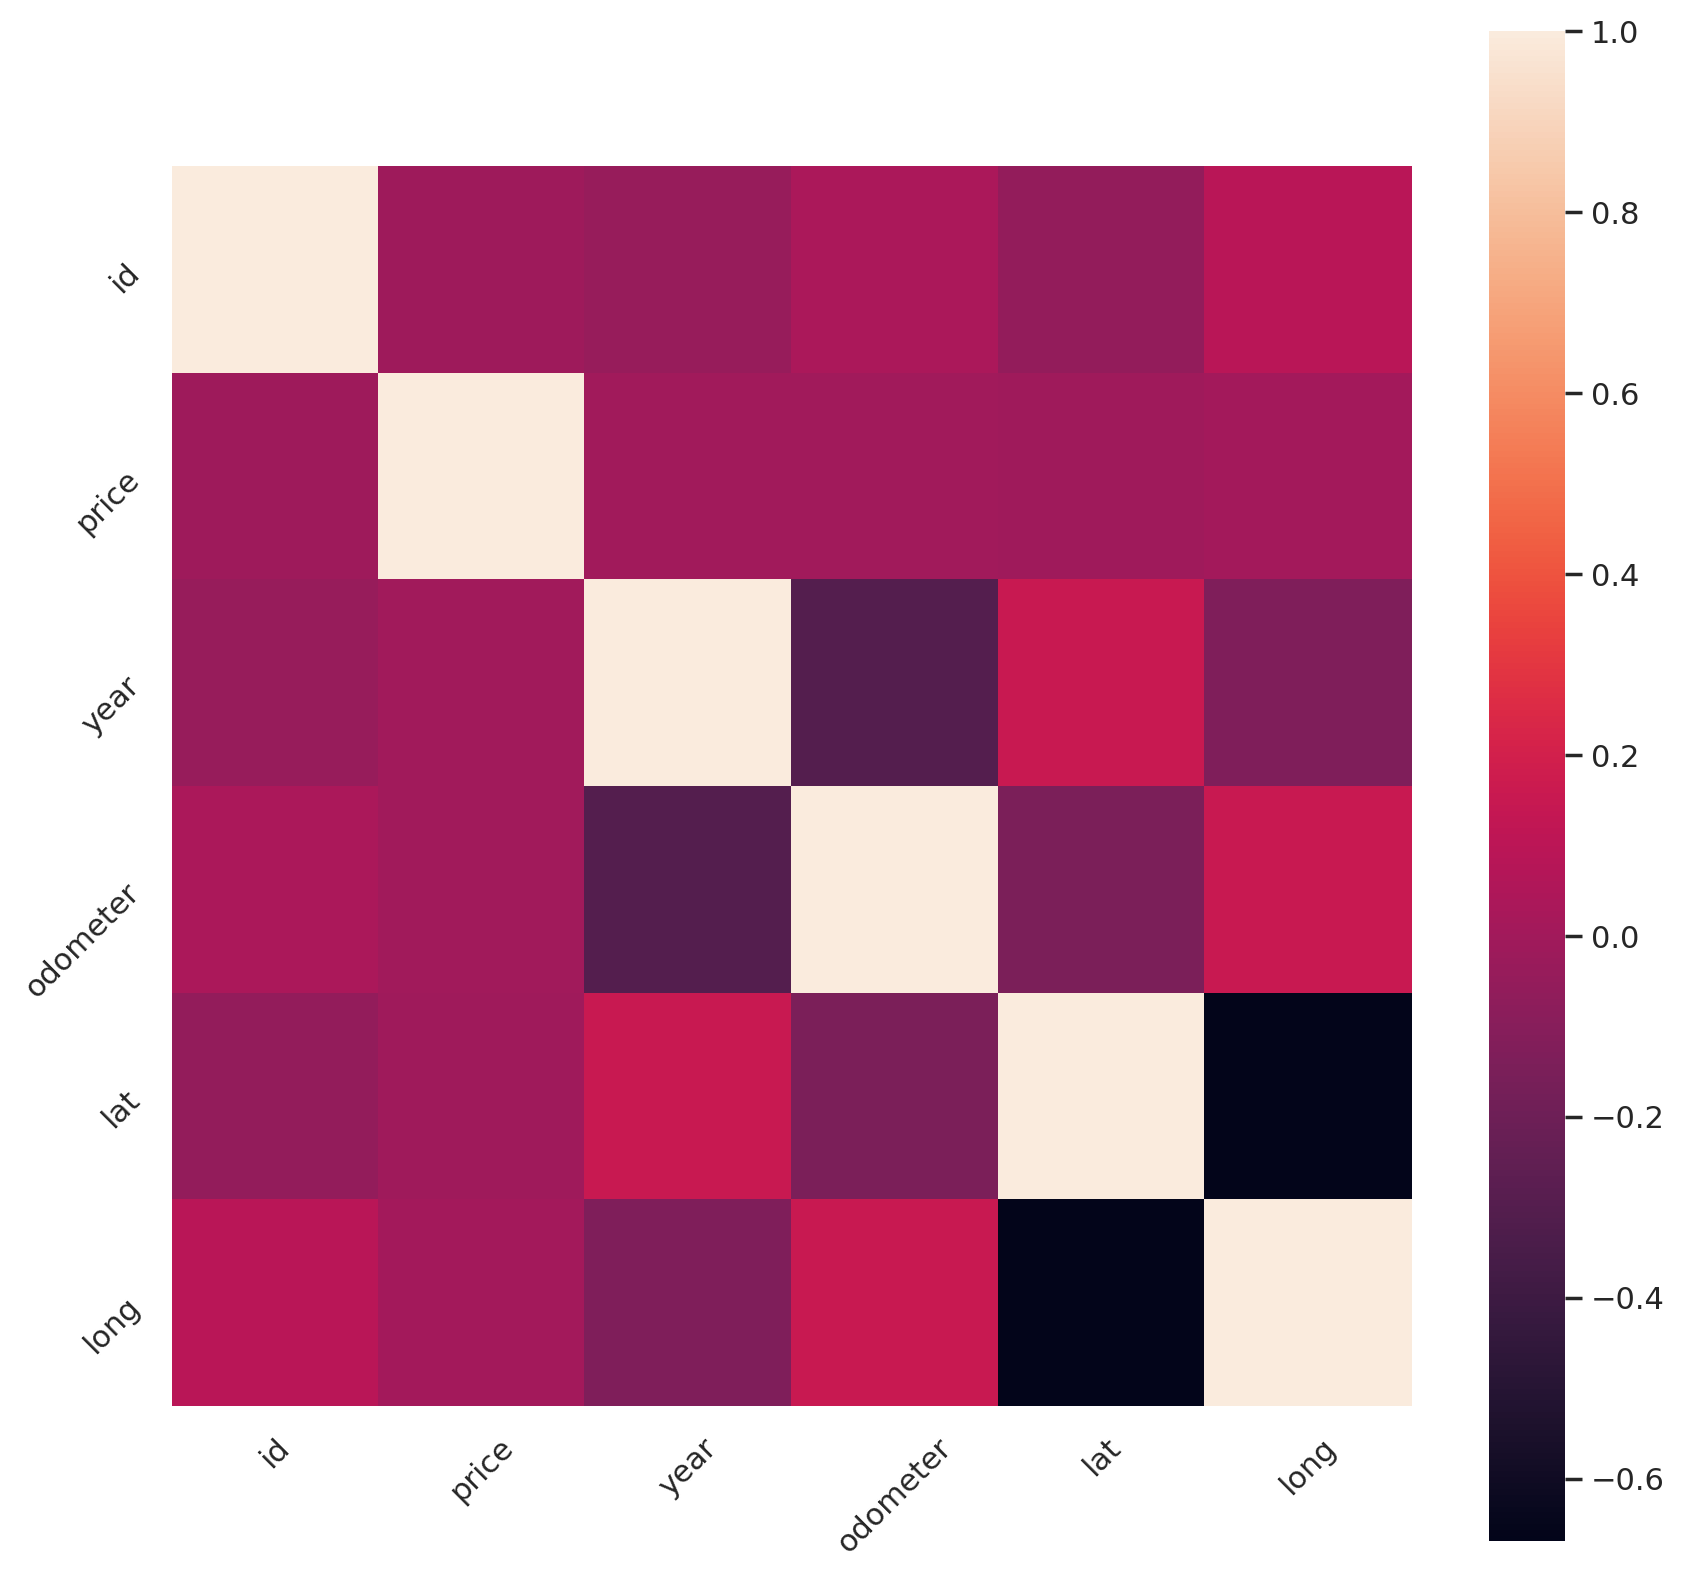

In [19]:
mpl.rcParams['figure.dpi'] = 200
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
# ax.set_xticklabels(rotation=30)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

[0.05924418 0.04392048 0.07558022 0.06506486 0.06214975 0.05900289
 0.0557938  0.04187348 0.0153166  0.07686641 0.02151764 0.04774931
 0.03594674 0.04392641 0.05003711 0.04764216 0.02143254 0.08846295
 0.08847248]


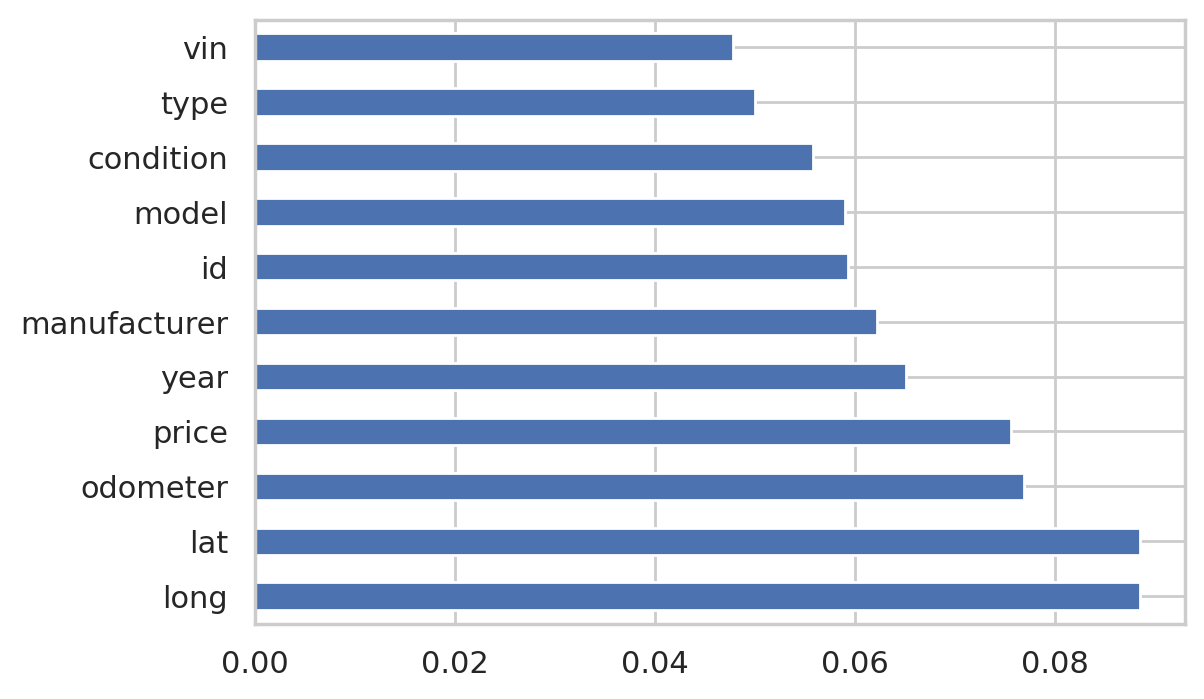

In [20]:
X = df_num.loc[:, df_num.columns != 'title_status'] #independent columns
Y = df_num.iloc[:,-10]    #target column 


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)

print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')

plt.show()

In [0]:
# melakukan drop pada feature yg tidak digunakan
df2 = df_num.drop(columns=['region','cylinders','fuel','transmission','drive','size','paint_color','state']) 

In [22]:
df2

,id,price,year,manufacturer,model,condition,odometer,title_status,vin,type,lat,long
0,1057,1289,77,38,2134,1,2909,0,7864,5,1577,306
1,1055,2126,80,13,3202,1,220,0,4550,0,1572,304
2,1051,2157,83,12,1789,0,3265,0,1333,9,1568,319
3,1049,1042,73,32,0,0,5941,0,612,9,1568,319
4,1048,1940,82,12,1766,0,4582,0,1300,9,1568,319
...,...,...,...,...,...,...,...,...,...,...,...,...
17403,15434,1637,82,35,3912,0,1138,0,6143,10,2046,203
17404,15433,2157,81,32,1334,0,1940,0,4235,11,2046,203
17405,15432,894,83,29,3160,0,1320,0,4622,10,2066,169
17406,15419,1081,82,37,1231,0,1167,0,3984,10,2066,169


## **Unduh Dataset hasil eksplorasi(dataset untuk pemodelan)**

In [0]:
df2.columns = ['id','price','year','manufacturer','model','condition','odometer','title_status','vin','type','lat','long']
df2.to_csv('dataset_klasifikasi.csv',index = False)

# **KLASIFIKASI**



In [24]:
df2

,id,price,year,manufacturer,model,condition,odometer,title_status,vin,type,lat,long
0,1057,1289,77,38,2134,1,2909,0,7864,5,1577,306
1,1055,2126,80,13,3202,1,220,0,4550,0,1572,304
2,1051,2157,83,12,1789,0,3265,0,1333,9,1568,319
3,1049,1042,73,32,0,0,5941,0,612,9,1568,319
4,1048,1940,82,12,1766,0,4582,0,1300,9,1568,319
...,...,...,...,...,...,...,...,...,...,...,...,...
17403,15434,1637,82,35,3912,0,1138,0,6143,10,2046,203
17404,15433,2157,81,32,1334,0,1940,0,4235,11,2046,203
17405,15432,894,83,29,3160,0,1320,0,4622,10,2066,169
17406,15419,1081,82,37,1231,0,1167,0,3984,10,2066,169


In [0]:
# menentukan mana independet kolom dan target kolom(class)
X = df2.loc[:, df2.columns != 'title_status'].values
Y = df2.iloc[:,-5].values

In [0]:
# Lalu data dipisah menjadi 80% data training dan 20% data testing
# lalu tiap data di  X dan Y dipisah menjadi data training dan testing

train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
Y_train, Y_test = Y[:train_pct_index], Y[train_pct_index:]

In [0]:
# Ditahap ini dilakukan fit antara independet kolom(train dan test) dengan library 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Lalu dilakukan pemodelan dengan KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
# dilakukan prediksi dengan Y(class) dengan hasil dari prediksi pada data testing

Y_pred = classifier.predict(X_test)

In [30]:
# hasil prediksi

Y_pred

array([0, 0, 0, ..., 0, 0, 0])

## **Evaluasi**

In [31]:
Y_test = pd.Series(Y_test, name='Actual')
Y_pred = pd.Series(Y_pred, name='Predicted')
fitur2_confusion = pd.crosstab(Y_test, Y_pred)

fitur2_confusion


Predicted,0,5
Actual,,
0,3363,4
1,12,0
2,2,0
4,93,0
5,8,0


In [32]:
#menampilkan confusion matriks dari hasil prediksi dan nilai akurasi

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[3363    0    0    0    4]
 [  12    0    0    0    0]
 [   2    0    0    0    0]
 [  93    0    0    0    0]
 [   8    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3367
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00         8

    accuracy                           0.97      3482
   macro avg       0.19      0.20      0.20      3482
weighted avg       0.94      0.97      0.95      3482



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **EKSPERIMEN**

Ditahap ini saya melakukan eksperimen, bagaimana jika tidak melakukan tahap feature selection. Sehingga pemilihan feature saya lakukan tanpa tahap feature selection. Dan semua feature digunakan dengan title_status sebagai class

In [35]:
df_num

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,state,lat,long
0,1057,12,1289,77,38,2134,1,4,3,2909,0,2,7864,1,1,5,1,0,1577,306
1,1055,12,2126,80,13,3202,1,0,3,220,0,1,4550,1,0,0,11,0,1572,304
2,1051,12,2157,83,12,1789,0,0,1,3265,0,1,1333,1,0,9,11,0,1568,319
3,1049,12,1042,73,32,0,0,0,3,5941,0,1,612,1,0,9,10,0,1568,319
4,1048,12,1940,82,12,1766,0,0,1,4582,0,1,1300,1,0,9,11,0,1568,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17403,15434,5,1637,82,35,3912,0,0,3,1138,0,2,6143,1,0,10,10,3,2046,203
17404,15433,5,2157,81,32,1334,0,0,1,1940,0,1,4235,1,0,11,6,3,2046,203
17405,15432,5,894,83,29,3160,0,4,3,1320,0,1,4622,2,0,10,0,3,2066,169
17406,15419,5,1081,82,37,1231,0,4,3,1167,0,1,3984,2,0,10,0,3,2066,169


In [36]:
X1 = df_num.loc[:, df_num.columns != 'title_status'].values
Y1 = df_num.iloc[:,-10].values
Y1

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
train_pct_index = int(0.8 * len(X1))
X1_train, X1_test = X1[:train_pct_index], X1[train_pct_index:]
Y1_train, Y1_test = Y1[:train_pct_index], Y1[train_pct_index:]

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1_train)

X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X1_train, Y1_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
Y1_pred = classifier.predict(X1_test)

## **Evaluasi**

In [41]:
Y1_test = pd.Series(Y1_test, name='Actual')
Y1_pred = pd.Series(Y1_pred, name='Predicted')
fitur_confusion = pd.crosstab(Y1_test, Y1_pred)

fitur_confusion


Predicted,0
Actual,
0,3367
1,12
2,2
4,93
5,8


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y1_test, Y1_pred))
print(classification_report(Y1_test, Y1_pred))

[[3367    0    0    0    0]
 [  12    0    0    0    0]
 [   2    0    0    0    0]
 [  93    0    0    0    0]
 [   8    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3367
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00         8

    accuracy                           0.97      3482
   macro avg       0.19      0.20      0.20      3482
weighted avg       0.94      0.97      0.95      3482



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
